In [ ]:
pip install --upgrade tensorflow==2.4.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.3 MB 12 kB/s 
     |████████████████████████████████| 132 kB 62.1 MB/s 
     |████████████████████████████████| 462 kB 60.3 MB/s 
     |████████████████████████████████| 14.8 MB 51.0 MB/s 
     |████████████████████████████████| 3.8 MB 53.0 MB/s 
     |████████████████████████████████| 2.9 MB 18.0 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68713 sha256=7d50c90666998527c7979ba898d30125874a5f4c062edf0a84bb619644987ca5
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existing installation: n

In [ ]:
import os
import glob
import xml.etree.ElementTree as ET
import pandas as pd
import tensorflow as tf
print(tf.__version__)

2.4.1


### Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Clone the TensorFlow models repository
!git clone --q https://github.com/tensorflow/models.git

# Change directory to the research folder within the models repository
%cd models/research=
# Compile the Protocol Buffer files needed for the object detection API
!protoc object_detection/protos/*.proto --python_out=.

# Copy the setup.py file to the current directory
!cp object_detection/packages/tf2/setup.py .

# Install the TensorFlow Object Detection API
!python -m pip install .

In [ ]:
# Run the model_builder_tf2_test.py script using Python
!python object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-06-03 09:33:50.882272: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0603 09:33:51.137033 140388483544960 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.59s
I0603 09:33:51.547081 140388483544960 test_util.py:2459] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.59s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.58s
I0603 09:33:52.123568 140388483544960 test_u

In [ ]:
pwd

'/content/models/research'

In [ ]:
import os
import shutil

# Source directory path
sourcepath = '/content/drive/MyDrive/pOTHOLES DATASET/valid'

# List all files in the source directory
sourcefiles = os.listdir('/content/drive/MyDrive/pOTHOLES DATASET/valid')

# Destination directory path
destinationpath = '/content/drive/MyDrive/pOTHOLES DATASET/test'

# Iterate through each file in the source directory and move it to the destination directory
for file in sourcefiles:
    shutil.move(os.path.join(sourcepath, file), os.path.join(destinationpath, file))


### Convert XML annotations into a structured DataFrame

In [ ]:
from glob import glob
from bs4 import BeautifulSoup
import pandas as pd

def xml_to_csv(ppath):
    # Get a list of XML files in the specified directory
    data_XML = glob(ppath + '/*.xml')
    data_list = []

    # Iterate through each XML file
    for i in range(len(data_XML)):
        annotation_file = data_XML[i]
        ds = BeautifulSoup(open(annotation_file).read(), "html.parser")

        # Extract information from each 'object' tag in the XML file
        for o in ds.find_all("object"):
            x_min = max(0, int(float(o.find("xmin").string)))
            y_min = max(0, int(float(o.find("ymin").string)))
            x_max = min(int(ds.find("width").string), int(float(o.find("xmax").string)))
            y_max = min(int(ds.find("height").string), int(float(o.find("ymax").string)))
            dr = data_XML[i].split('/')
            width = int(ds.find("width").string)
            height = int(ds.find("height").string)
            img_paths = '/' + dr[1] + '/' + dr[2] + '/' + ds.find("filename").string
            Name = o.find("name").string

            # Check for invalid bounding box coordinates
            if x_min >= x_max or y_min >= y_max:
                continue
            elif x_max <= x_min or y_max <= y_min:
                continue

            # Create a sample entry with relevant information
            sample = [str(img_paths), width, height, Name, x_min, y_min, x_max, y_max]
            data_list.append(sample)

    # Convert the list of samples to a Pandas DataFrame
    data = pd.DataFrame(data_list)
    data.columns = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    return data


In [ ]:
Train=xml_to_csv('/content/drive/MyDrive/pOTHOLES DATASET/train')

In [ ]:
Test=xml_to_csv('/content/drive/MyDrive/pOTHOLES DATASET/test')

In [ ]:
Train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,/content/drive/img-263_jpg.rf.892eb0397a70a352...,720,720,pothole,228,241,444,362
1,/content/drive/img-261_jpg.rf.e3583096f4d7e2a1...,720,720,pothole,213,251,483,409
2,/content/drive/img-260_jpg.rf.3acd135908f14f0e...,720,720,pothole,197,272,449,378
3,/content/drive/img-262_jpg.rf.3db190e680343ed3...,720,720,pothole,276,263,377,349
4,/content/drive/img-259_jpg.rf.86aaa968ce87cb21...,720,720,pothole,249,243,464,413


In [ ]:
Train['class'].unique()

array(['pothole'], dtype=object)

In [ ]:
Test.head(20)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,/content/drive/img-168_jpg.rf.af3590e07b06b43e...,720,720,pothole,242,262,475,358
1,/content/drive/img-168_jpg.rf.af3590e07b06b43e...,720,720,pothole,79,95,146,139
2,/content/drive/img-161_jpg.rf.211541e7178a4a93...,720,720,pothole,281,289,420,383
3,/content/drive/img-146_jpg.rf.61be25b3053a51f6...,720,720,pothole,153,253,439,421
4,/content/drive/img-107_jpg.rf.2e40485785f6e5e2...,720,720,pothole,230,286,456,459
5,/content/drive/img-105_jpg.rf.3fe9dff3d1631e79...,720,720,pothole,293,296,444,409
6,/content/drive/img-105_jpg.rf.3fe9dff3d1631e79...,720,720,pothole,297,453,340,490
7,/content/drive/img-337_jpg.rf.aee9516f4db8d93d...,482,300,pothole,153,92,346,178
8,/content/drive/img-307_jpg.rf.65a7065124972969...,571,300,pothole,197,8,428,273
9,/content/drive/img-336_jpg.rf.eeafb6921ceff278...,300,403,pothole,144,98,212,129


In [ ]:
for i in range(len(Train)):
    Train.filename[i]=Train.filename[i].rsplit('/', 1)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in range(len(Test)):
    Test.filename[i]=Test.filename[i].rsplit('/', 1)[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
Test['class'].unique()

array(['pothole'], dtype=object)

In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1256 non-null   object
 1   width     1256 non-null   int64 
 2   height    1256 non-null   int64 
 3   class     1256 non-null   object
 4   xmin      1256 non-null   int64 
 5   ymin      1256 non-null   int64 
 6   xmax      1256 non-null   int64 
 7   ymax      1256 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 78.6+ KB


In [ ]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  483 non-null    object
 1   width     483 non-null    int64 
 2   height    483 non-null    int64 
 3   class     483 non-null    object
 4   xmin      483 non-null    int64 
 5   ymin      483 non-null    int64 
 6   xmax      483 non-null    int64 
 7   ymax      483 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 30.3+ KB


In [ ]:
Test.filename[300][-3:]

'jpg'

In [ ]:
/content/drive/MyDrive/customTF2

In [ ]:
Test.to_csv(r'/content/drive/MyDrive/CustomTF2_2/data/test_labels.csv')

In [ ]:
Train.to_csv(r'/content/drive/MyDrive/CustomTF2_2/data/train_labels.csv')

In [ ]:
# Initialize counters for image and non-image (xml) files


# List all files in the specified directory
sourcefiles = os.listdir('/content/drive/MyDrive/CustomTF2_2/data/train')

# Iterate through each file in the directory
for file in sourcefiles:
    # Check if the file has a '.jpg' extension, indicating it is an image file
    if file.endswith('.jpg'):
        i += 1  # Increment the image counter
    else:
        j += 1  # Increment the non-image (xml) counter

# Print the counts of image and non-image files
print("Number of images =", i, ', Number of xml files =', j)


images= 0  xml= 465


In [ ]:
i = 0  # Counter for images
j = 0  # Counter for non-image (xml) files
sourcefiles = os.listdir('/content/drive/MyDrive/CustomTF2_2/data/test')
for file in sourcefiles:
    if file.endswith('.jpg'):
            i += 1  # Increment the image counter
    else:
        j += 1  # Increment the non-image (xml) counter
print("images=",i,' xml=',j)

images= 0  xml= 200


In [ ]:
# Import necessary libraries
import os
import shutil

# Specify the source directory containing files to be moved
sourcepath = '/content/drive/MyDrive/CustomTF2_2/data/train'

# List all files in the specified source directory
sourcefiles = os.listdir('/content/drive/MyDrive/CustomTF2_2/data/train')

# Specify the destination directory to move image files
destinationpath = '/content/drive/MyDrive/CustomTF2_2/data/Images'

# Iterate through each file in the source directory
for file in sourcefiles:
    # Check if the file has a '.jpg' extension, indicating it is an image file
    if file.endswith('.jpg'):
        # Move the image file to the specified destination directory
        shutil.move(os.path.join(sourcepath, file), os.path.join(destinationpath, file))


In [ ]:
# Specify the source directory containing files to be moved
sourcepath = '/content/drive/MyDrive/CustomTF2_2/data/test'

# List all files in the specified source directory
sourcefiles = os.listdir('/content/drive/MyDrive/CustomTF2_2/data/test')

# Specify the destination directory to move image files
destinationpath = '/content/drive/MyDrive/CustomTF2_2/data/Images'

# Iterate through each file in the source directory
for file in sourcefiles:
    # Check if the file has a '.jpg' extension, indicating it is an image file
    if file.endswith('.jpg'):
        # Move the image file to the specified destination directory
        shutil.move(os.path.join(sourcepath, file), os.path.join(destinationpath, file))


'/content/models/research'

In [ ]:
cd /content/drive/MyDrive/CustomTF2_2/data/

/content/drive/MyDrive/CustomTF2_2/data


In [ ]:
cd /content/drive/MyDrive/CustomTF2_2/data

/content/drive/MyDrive/CustomTF2_2/data


In [ ]:
pwd

'/content/drive/MyDrive/CustomTF2_2/data'

In [ ]:
# Generate TFRecord file for training data
# The script 'generate_tfrecord.py' takes input from 'train_labels.csv', uses 'label_map.pbtxt' for label mapping,
# and reads images from the 'Images/' directory. The resulting TFRecord file is saved as 'train.record'.
!python /content/drive/MyDrive/CustomTF2_2/generate_tfrecord.py train_labels.csv label_map.pbtxt Images/ train.record

# Generate TFRecord file for testing data
# Similar to the training data, the script generates a TFRecord file for testing using 'test_labels.csv',
# 'label_map.pbtxt', 'Images/' directory, and saves it as 'test.record'.
!python /content/drive/MyDrive/CustomTF2_2/generate_tfrecord.py test_labels.csv label_map.pbtxt Images/ test.record


groups: 100% 465/465 [00:01<00:00, 258.32it/s]
Successfully created the TFRecords: /content/drive/MyDrive/CustomTF2_2/data/train.record
groups: 100% 200/200 [00:00<00:00, 275.28it/s]
Successfully created the TFRecords: /content/drive/MyDrive/CustomTF2_2/data/test.record


In [ ]:
# Download the pre-trained model for object detection
# The model is 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8' and is available from TensorFlow's model zoo.
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

# Extract the contents of the downloaded tar.gz file
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz


--2022-06-02 22:22:12--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 173.194.214.128, 2607:f8b0:400c:c0b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|173.194.214.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  49.2MB/s    in 0.4s    

2022-06-02 22:22:12 (49.2 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tp

In [ ]:
!cp /content/models/research/object_detection/configs/tf2/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config /content/drive/MyDrive/CustomTF2_2/data

In [ ]:
%cd /content/models/research/object_detection

/content/models/research/object_detection


In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 43 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 7s (61.6 MB/s)
(Reading database ... 155632 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155610 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+c

In [ ]:
!pip uninstall opencv-python-headless
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [ ]:
# Run the training process for the object detection model using TensorFlow 2.x
# The script 'model_main_tf2.py' is executed with specified parameters:
#   --pipeline_config_path: Path to the pipeline configuration file for the chosen model architecture.
#   --model_dir: Directory where the trained model and training summaries will be saved.
#   --alsologtostderr: Log to stderr in addition to log files.
!python model_main_tf2.py --pipeline_config_path=/content/drive/MyDrive/CustomTF2_2/data/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config --model_dir=/content/drive/MyDrive/CustomTF2_2/training --alsologtostderr


2022-06-02 23:04:24.069230: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0602 23:04:24.074993 140398323275648 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0602 23:04:24.081395 140398323275648 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0602 23:04:24.081585 140398323275648 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0602 23:04:24.228092 140398323275648 deprecation.py:356] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experimental

In [ ]:
# Run inference using a pre-trained model with TensorFlow Object Detection API

# Path to the pipeline configuration file
--pipeline_config_path=/content/drive/MyDrive/CustomTF2_2/data/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config

# Directory to save the output inference graph and results
--model_dir=/content/drive/MyDrive/CustomTF2_2/data/inference_graph

# Directory containing the checkpoint files of the trained model
--checkpoint_dir=/content/drive/MyDrive/CustomTF2_2/training/

# Flag indicating whether to log messages to standard error in addition to logging to files
--alsologtostderr


W0603 09:57:45.353472 140299525015424 model_lib_v2.py:1090] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0603 09:57:45.353748 140299525015424 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0603 09:57:45.353836 140299525015424 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0603 09:57:45.353899 140299525015424 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0603 09:57:45.354003 140299525015424 model_lib_v2.py:1110] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2022-06-03 09:57:46.207622: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config 

In [ ]:
# Run the exporter script to export the trained model for inference

# Directory containing the trained model checkpoint files
--trained_checkpoint_dir=/content/drive/MyDrive/CustomTF2_2/training

# Path to the pipeline configuration file
--pipeline_config_path=/content/drive/MyDrive/CustomTF2_2/data/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config

# Directory to save the exported inference graph
--output_directory /content/drive/MyDrive/CustomTF2_2/data/inference_graph


2022-06-03 09:47:03.456391: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0603 09:47:07.680166 140426331551616 deprecation.py:628] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0603 09:47:26.668062 1404263315516

 ### loading a saved TensorFlow object detection model and using it to make predictions on a sample image

Loading model...Done!


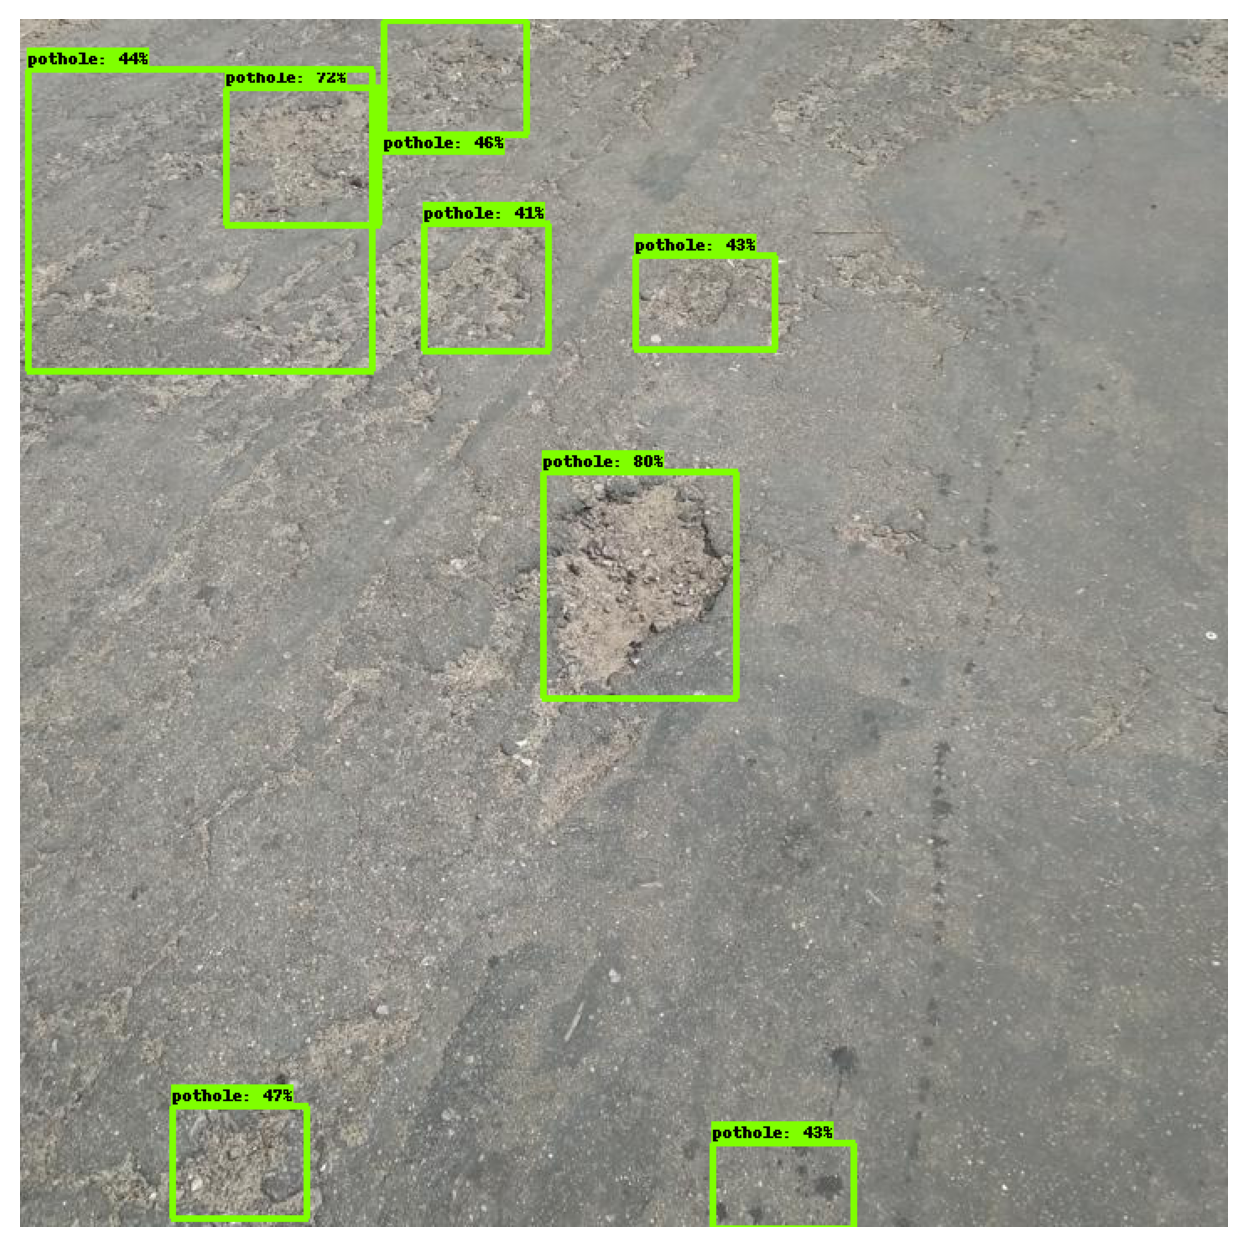

In [ ]:
import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from google.colab.patches import cv2_imshow
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

# Define the output display size
IMAGE_SIZE = (12, 8)

# Path to the saved model
PATH_TO_SAVED_MODEL = "/content/drive/MyDrive/CustomTF2_2/data/inference_graph/saved_model"

# Load the saved model
print('Loading model...', end='')
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

# Load the label map
category_index = label_map_util.create_category_index_from_labelmap("/content/drive/MyDrive/CustomTF2_2/data/label_map.pbtxt", use_display_name=True)

# Function to load an image into a numpy array
def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

# Path to the sample image
image_path = "/content/drive/MyDrive/CustomTF2_2/data/Images/img-134_jpg.rf.833f57b2c592a23189208dcb656eaaa2.jpg"

# Load the image into a numpy array
image_np = load_image_into_numpy_array(image_path)

# Convert the image tensor
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]

# Make detections using the model
detections = detect_fn(input_tensor)

# Process and visualize the detections
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
detections['num_detections'] = num_detections

# Detection classes should be integers
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

# Create a copy of the image with overlaid detections
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    detections['detection_boxes'],
    detections['detection_classes'],
    detections['detection_scores'],
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=200,
    min_score_thresh=0.4,
    agnostic_mode=False
)

# Display the image with detections
%matplotlib inline
plt.figure(figsize=IMAGE_SIZE, dpi=200)
plt.axis("off")
plt.imshow(image_np_with_detections)
plt.show()


In [ ]:
image_np.shape

(720, 720, 3)